In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import mord

# Let’s ask ChatGPT 3.5

In [ ]:
# Read DataFrames
df_products = pd.read_csv('olist_products_dataset.csv')
df_product_category_translation = pd.read_csv('product_category_name_translation.csv')

# Merge DataFrames
df_products_merged = df_products.merge(df_product_category_translation, on='product_category_name', how='left')

# Analyze the most common product categories
category_counts = df_products_merged['product_category_name_english'].value_counts()

# Display the results
print("The most common product categories are:")
print(category_counts.head(10))

The most common product categories are:
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_category_name_english, dtype: int64


### Let’s ask ChatGPT 3.6

In [5]:
# Read DataFrames
df_products = pd.read_csv('olist_products_dataset.csv')
df_product_category_translation = pd.read_csv('product_category_name_translation.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')

# Merge DataFrames
df_products_merged = df_products.merge(df_product_category_translation, on='product_category_name', how='left')
df_order_items_merged = df_order_items.merge(df_products_merged, on='product_id', how='left')
df_orders_merged = df_orders.merge(df_customers, on='customer_id', how='left')
df_merged = df_order_items_merged.merge(df_orders_merged, on='order_id', how='left')

# Calculate sales volume and revenue per category
category_sales = df_merged.groupby(['product_category_name_english', 'customer_state']).agg({'order_id': 'count', 'price': 'sum'}).reset_index()
category_sales.columns = ['product_category', 'customer_state', 'sales_volume', 'revenue']

# Sort by sales_volume and revenue
category_sales_sorted = category_sales.sort_values(by=['sales_volume', 'revenue'], ascending=False)

In [6]:
# Display the results
print("The most popular product categories in terms of sales volume and revenue are:")
category_sales_sorted.head(10)

The most popular product categories in terms of sales volume and revenue are:


product_category customer_state  sales_volume    revenue
162          bed_bath_table             SP          5235  478284.52
811           health_beauty             SP          4204  462305.22
1231         sports_leisure             SP          3667  386357.01
727         furniture_decor             SP          3531  286708.02
935              housewares             SP          3265  275378.63
305   computers_accessories             SP          3170  350747.88
1354          watches_gifts             SP          2281  435009.92
109                    auto             SP          1747  214277.27
1327                   toys             SP          1712  185561.83
1301              telephony             SP          1646  104088.28

In [7]:
print("\nSales performance across different regions in Brazil:")
sales_by_region


Sales performance across different regions in Brazil:


revenue                                        \
customer_state                   AC        AL       AM       AP        BA   
product_category                                                            
agro_industry_and_commerce     0.00   1476.30     0.00   589.99   2257.00   
air_conditioning               0.00    540.00    89.00     0.00    832.86   
art                            0.00      0.00    58.35   145.89    898.95   
arts_and_craftmanship          0.00      0.00     0.00     0.00      0.00   
audio                          0.00    550.09    89.90     0.00   1430.69   
...                             ...       ...      ...      ...       ...   
stationery                   528.90    655.01   698.99   234.90   7355.95   
tablets_printing_image         0.00      0.00    50.00     0.00    505.80   
telephony                   1103.96   4508.15   766.00   304.78  21144.41   
toys                         234.79   1053.07   721.56   297.84  14707.03   
watches_gifts               1389.60  11683.27  1811.35  1639.80  48885.59   

                                                                             \
customer_state                    CE        DF        ES        GO       MA   
product_category                                                              
agro_industry_and_commerce    452.90      0.00    442.30   2298.39   559.99   
air_conditioning              446.16    468.00    898.80    940.89   199.00   
art                             0.00    565.79     49.90    409.57     0.00   
arts_and_craftmanship           0.00    129.49      0.00      0.00     0.00   
audio                         902.89   2048.23   1197.78   1974.88   733.88   
...                              ...       ...       ...       ...      ...   
stationery                   3173.43   4853.09   5503.36   4579.82  1455.89   
tablets_printing_image         29.99      0.00   1026.79     99.00   152.99   
telephony                    7539.33   6243.51   9323.35   6169.94  5002.02   
toys                         7869.80  11791.85  10571.56   7913.87  3284.03   
watches_gifts               29285.24  32730.37  29461.00  33257.72  9904.99   

                            ... sales_volume                                \
customer_state              ...           PR   RJ  RN  RO RR   RS   SC  SE   
product_category            ...                                              
agro_industry_and_commerce  ...           12   28   0   4  0    9    3   0   
air_conditioning            ...           12   69   0   0  0   15    4   0   
art                         ...            9   33   1   2  0    9    6   0   
arts_and_craftmanship       ...            0    0   0   0  0    0    1   0   
audio                       ...           18   58   1   0  0   16   10   0   
...                         ...          ...  ...  ..  .. ..  ...  ...  ..   
stationery                  ...          128  331  13   8  2  148   94   3   
tablets_printing_image      ...            3   10   0   0  0    1    0   0   
telephony                   ...          250  438  25  19  4  292  175  28   
toys                        ...          205  585  25  15  0  212  120  11   
watches_gifts               ...          307  874  49  15  1  233  185  20   

                                      
customer_state                SP  TO  
product_category                      
agro_industry_and_commerce    95   0  
air_conditioning             139   0  
art                           99   0  
arts_and_craftmanship         16   0  
audio                        145   1  
...                          ...  ..  
stationery                  1064   3  
tablets_printing_image        32   0  
telephony                   1646  21  
toys                        1712  13  
watches_gifts               2281  30  

[71 rows x 54 columns]

# Let’s ask ChatGPT 3.7 & Appendix 3.2

In [8]:
# Flatten the multi-level column index
sales_by_region.columns = ['_'.join(col) for col in sales_by_region.columns]

# Reset the index of sales_by_region DataFrame
sales_by_region_reset = sales_by_region.reset_index()

# Extract revenue and sales_volume columns
revenue_columns = [col for col in sales_by_region_reset.columns if 'revenue' in col]
sales_volume_columns = [col for col in sales_by_region_reset.columns if 'sales_volume' in col]

# Create DataFrames with only 'revenue' and 'sales_volume' columns
revenue_df = sales_by_region_reset[['product_category'] + revenue_columns]
sales_volume_df = sales_by_region_reset[['product_category'] + sales_volume_columns]

# Rename columns to remove the 'revenue_' and 'sales_volume_' prefix
revenue_df.columns = ['product_category'] + [col.replace('revenue_', '') for col in revenue_columns]
sales_volume_df.columns = ['product_category'] + [col.replace('sales_volume_', '') for col in sales_volume_columns]
# Create a melted DataFrame for bar plots
sales_volume_melted = pd.melt(sales_volume_df, id_vars='product_category', var_name='customer_state', value_name='sales_volume')
revenue_melted = pd.melt(revenue_df, id_vars='product_category', var_name='customer_state', value_name='revenue')

## Bar plots

In [9]:
sales_volume_melted.product_category.nunique()

71

C:\Users\siwiak\AppData\Local\Temp\ipykernel_38460\1670476093.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_volume_melted, x='customer_state', y='sales_volume', hue='product_category', ci=None)


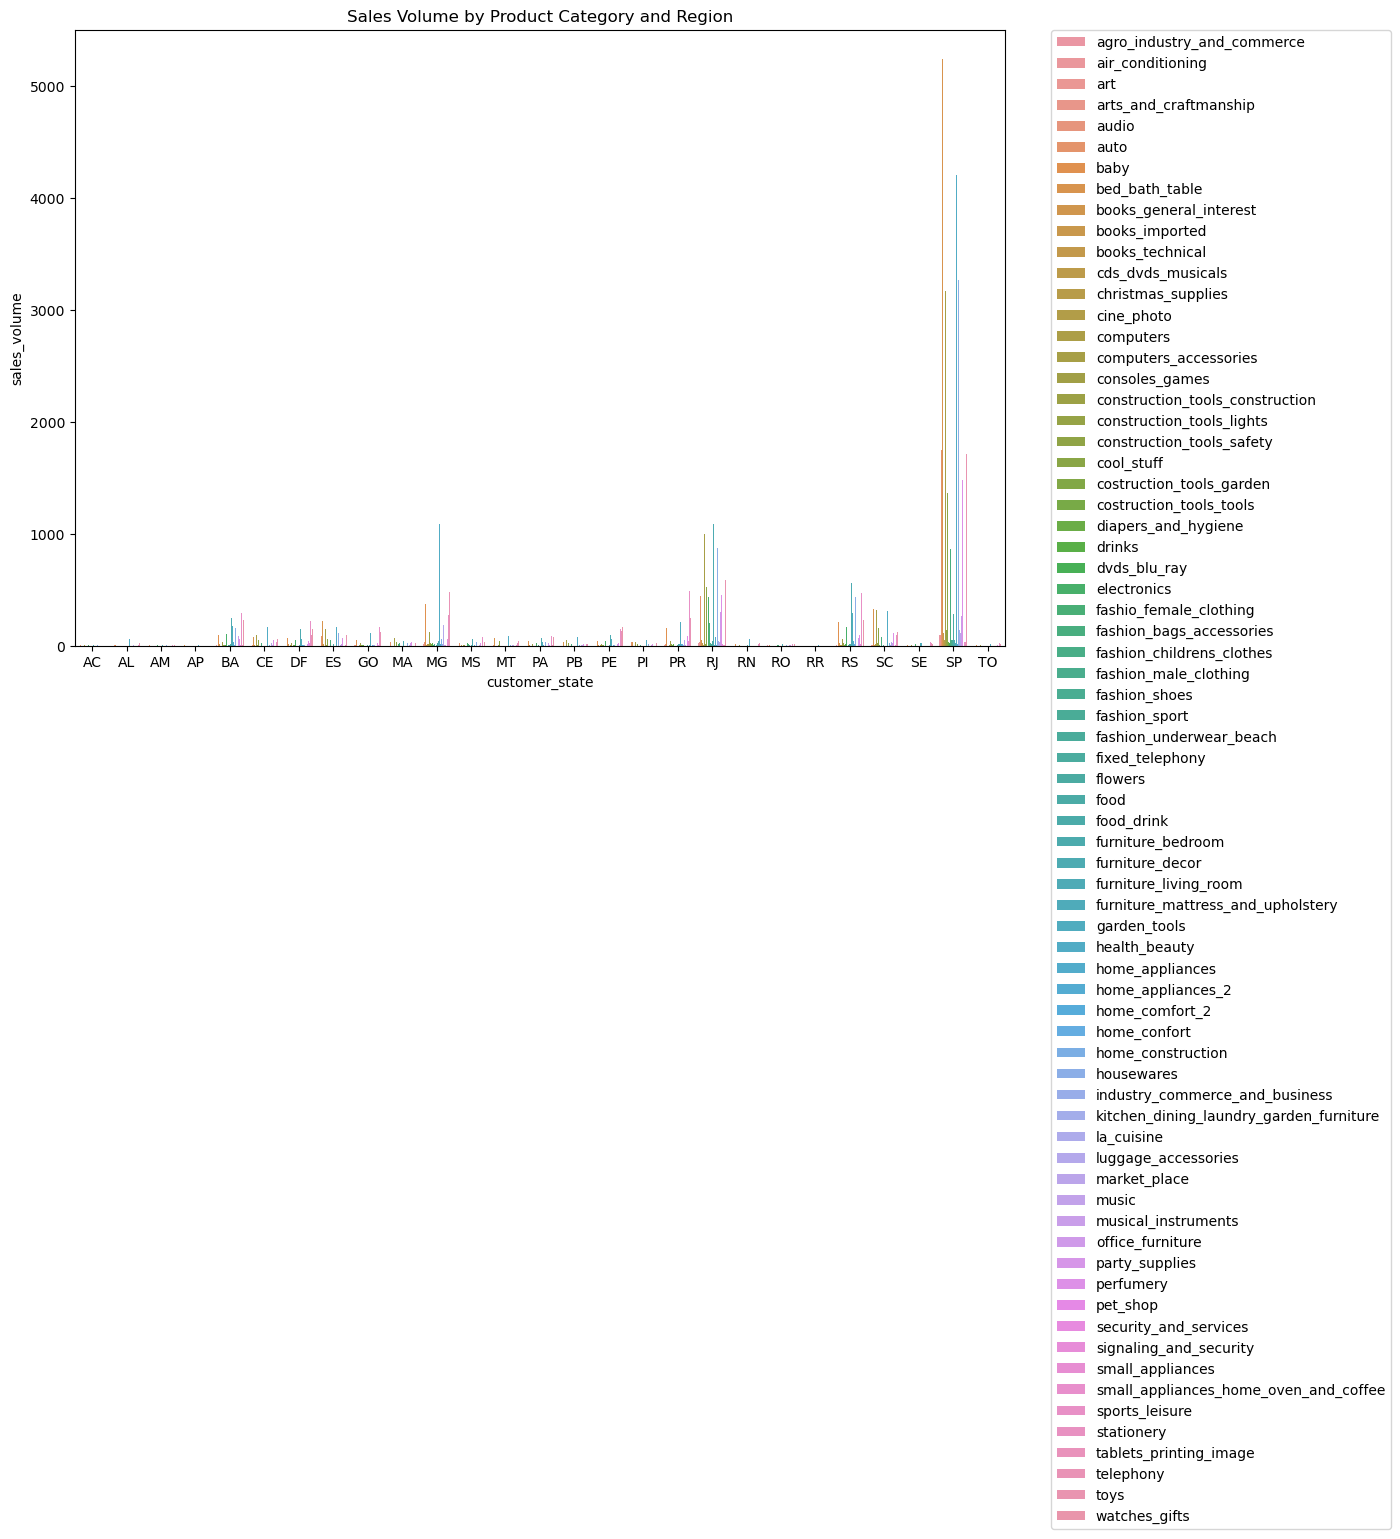

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_volume_melted, x='customer_state', y='sales_volume', hue='product_category', ci=None)
plt.title('Sales Volume by Product Category and Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Heatmaps

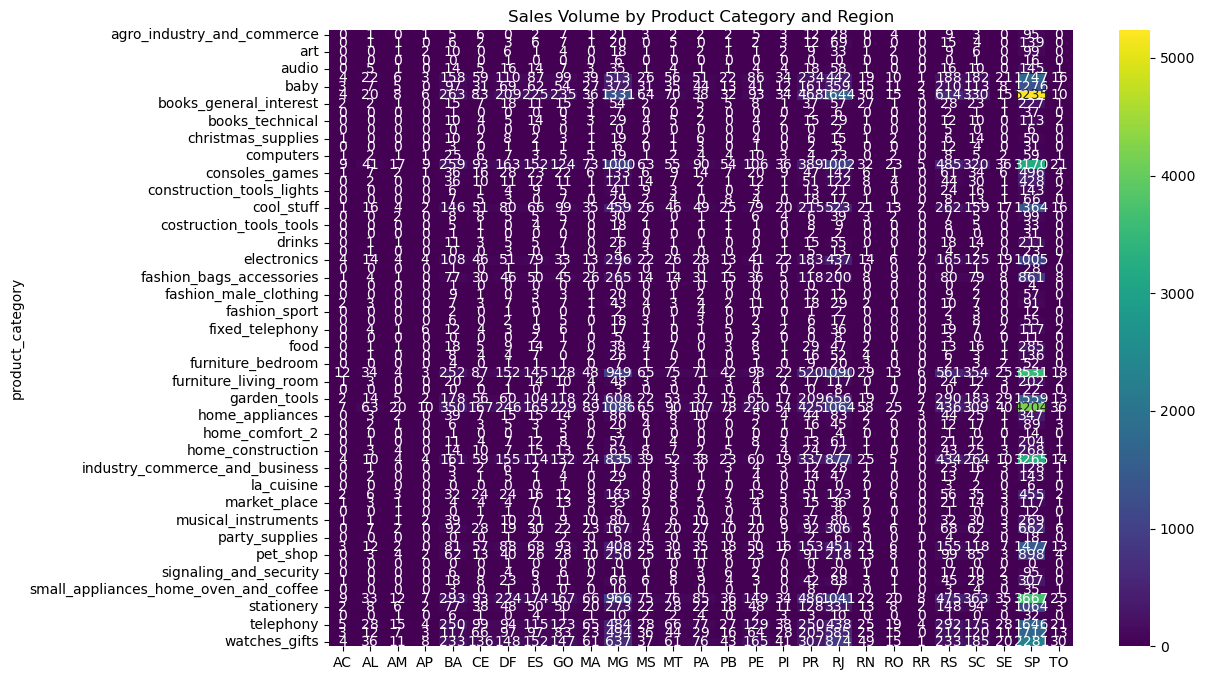

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(sales_volume_df.set_index('product_category'), annot=True, cmap='viridis', fmt='.0f')
plt.title('Sales Volume by Product Category and Region')
plt.show()

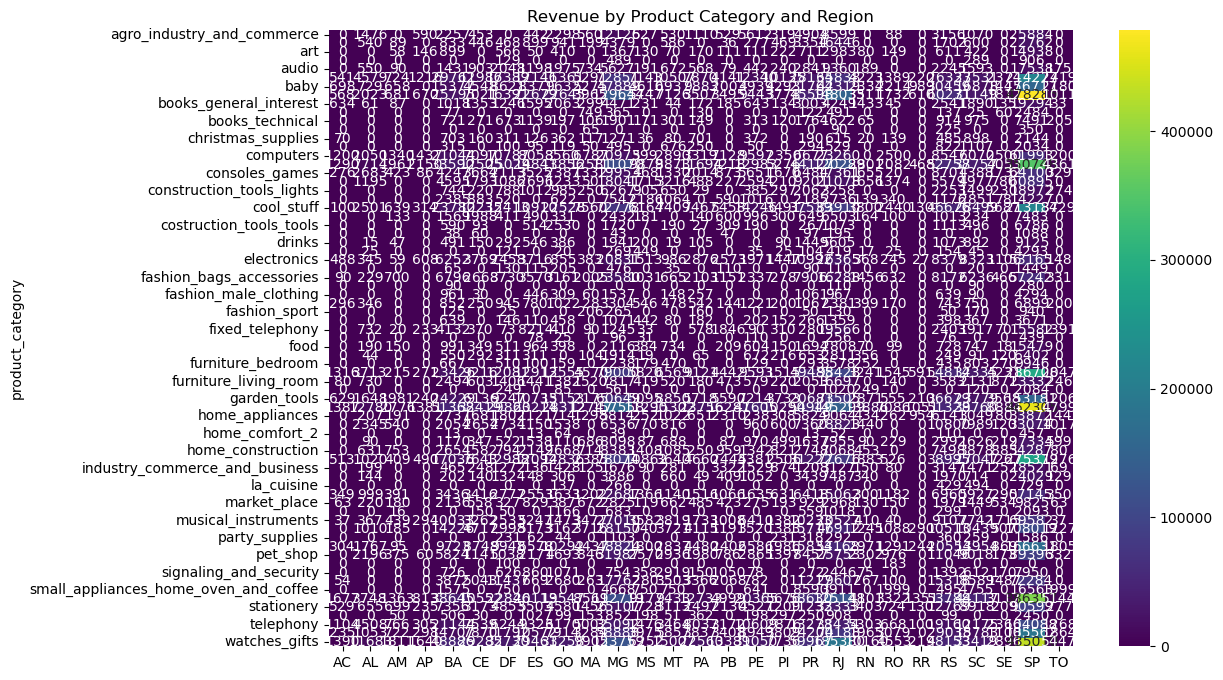

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_df.set_index('product_category'), annot=True, cmap='viridis', fmt='.0f')
plt.title('Revenue by Product Category and Region')
plt.show()

# Let’s ask ChatGPT 3.8

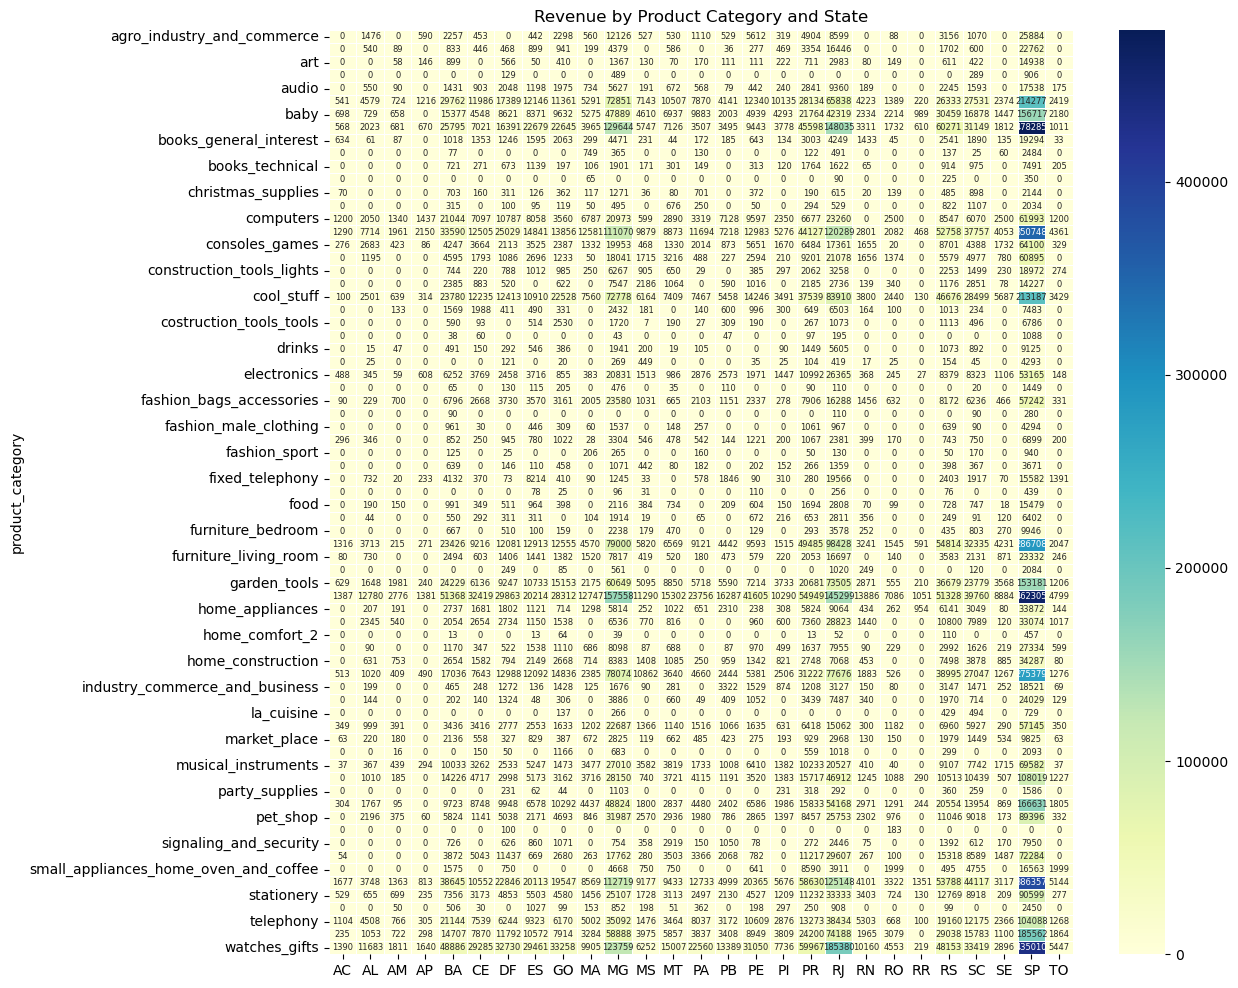

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(revenue_df.set_index('product_category'), cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, annot_kws={"size": 6})
plt.title("Revenue by Product Category and State")
plt.show()

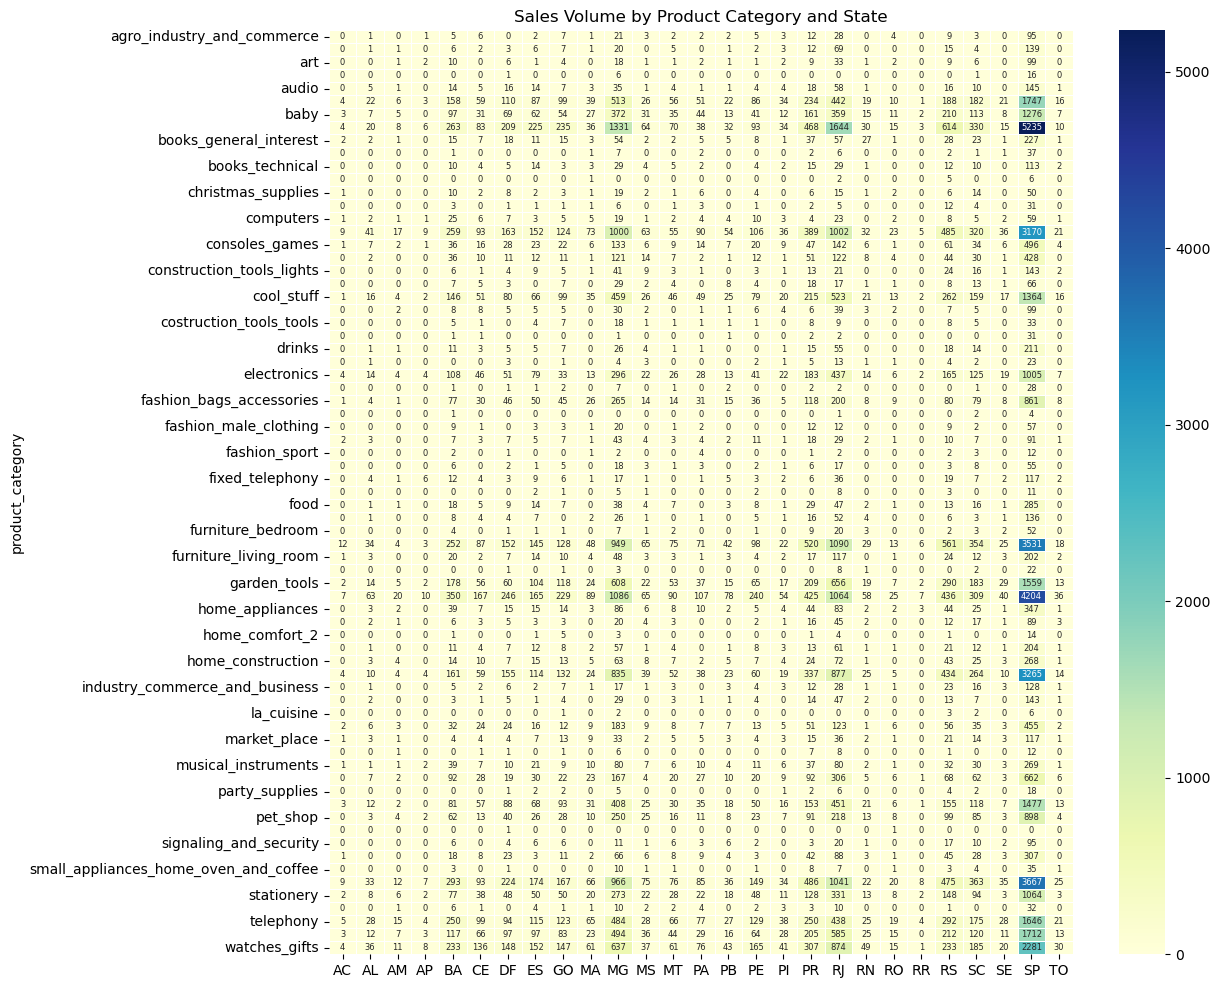

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(sales_volume_df.set_index('product_category'), cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, annot_kws={"size": 6})
plt.title("Sales Volume by Product Category and State")
plt.show()

# Let’s ask ChatGPT 3.9

In [16]:
# Group the data by product category and region (state)
grouped_data = merged_data.groupby(['product_category_name_english', 'customer_state'])


# Calculate the average product price, freight value, and payment value for each group
average_values = grouped_data[['price', 'freight_value', 'payment_value']].mean()

# Reset the index to have a flat DataFrame
average_values = average_values.reset_index()

# Rename the columns for clarity
average_values.columns = ['product_category', 'state', 'avg_product_price', 'avg_freight_value', 'avg_payment_value']

# You can now explore the 'average_values' DataFrame to analyze the differences across product categories and regions

NameError: name 'merged_data' is not defined

# Let’s ask ChatGPT 3.10

In [17]:
# Loadin required data
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')

In [18]:
# Step 1: Merge 'df_order_items' with 'df_orders' on 'order_id'
merged_data = pd.merge(df_order_items, df_orders, on='order_id')

# Step 2: Merge the result with 'df_products' on 'product_id'
merged_data = pd.merge(merged_data, df_products, on='product_id')

# Step 3: Merge the result with 'df_product_category_translation' on 'product_category_name'
merged_data = pd.merge(merged_data, df_product_category_translation, on='product_category_name')

# Step 4: Merge the result with 'df_customers' on 'customer_id'
merged_data = pd.merge(merged_data, df_customers, on='customer_id')

# Step 5: Merge the result with 'df_order_payments' on 'order_id'
merged_data = pd.merge(merged_data, df_order_payments, on='order_id')

# Let’s ask ChatGPT 3.9 - once more

In [19]:
# Group the data by product category and region (state)
grouped_data = merged_data.groupby(['product_category_name_english', 'customer_state'])


# Calculate the average product price, freight value, and payment value for each group
average_values = grouped_data[['price', 'freight_value', 'payment_value']].mean()

# Reset the index to have a flat DataFrame
average_values = average_values.reset_index()

# Rename the columns for clarity
average_values.columns = ['product_category', 'state', 'avg_product_price', 'avg_freight_value', 'avg_payment_value']

# You can now explore the 'average_values' DataFrame to analyze the differences across product categories and regions

# Let’s ask ChatGPT 3.11

AttributeError: 'PairGrid' object has no attribute 'set_axis_labels'

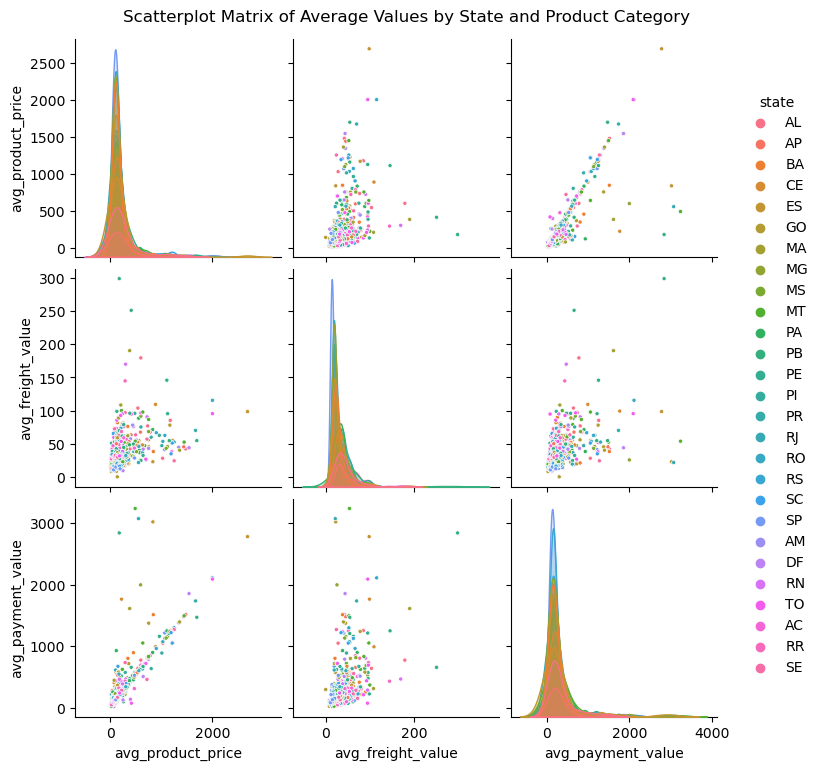

In [20]:
# Create a pair plot with different colors for each state
g = sns.pairplot(data=average_values, hue='state', markers='.')

# Set the title and labels for each plot
g.fig.suptitle("Scatterplot Matrix of Average Values by State and Product Category", y=1.02)
g.set_axis_labels("Average Product Price", "Average Freight Value", "Average Payment Value")

# Adjust legend
g.add_legend(title="State")

# Show the plot
plt.show()

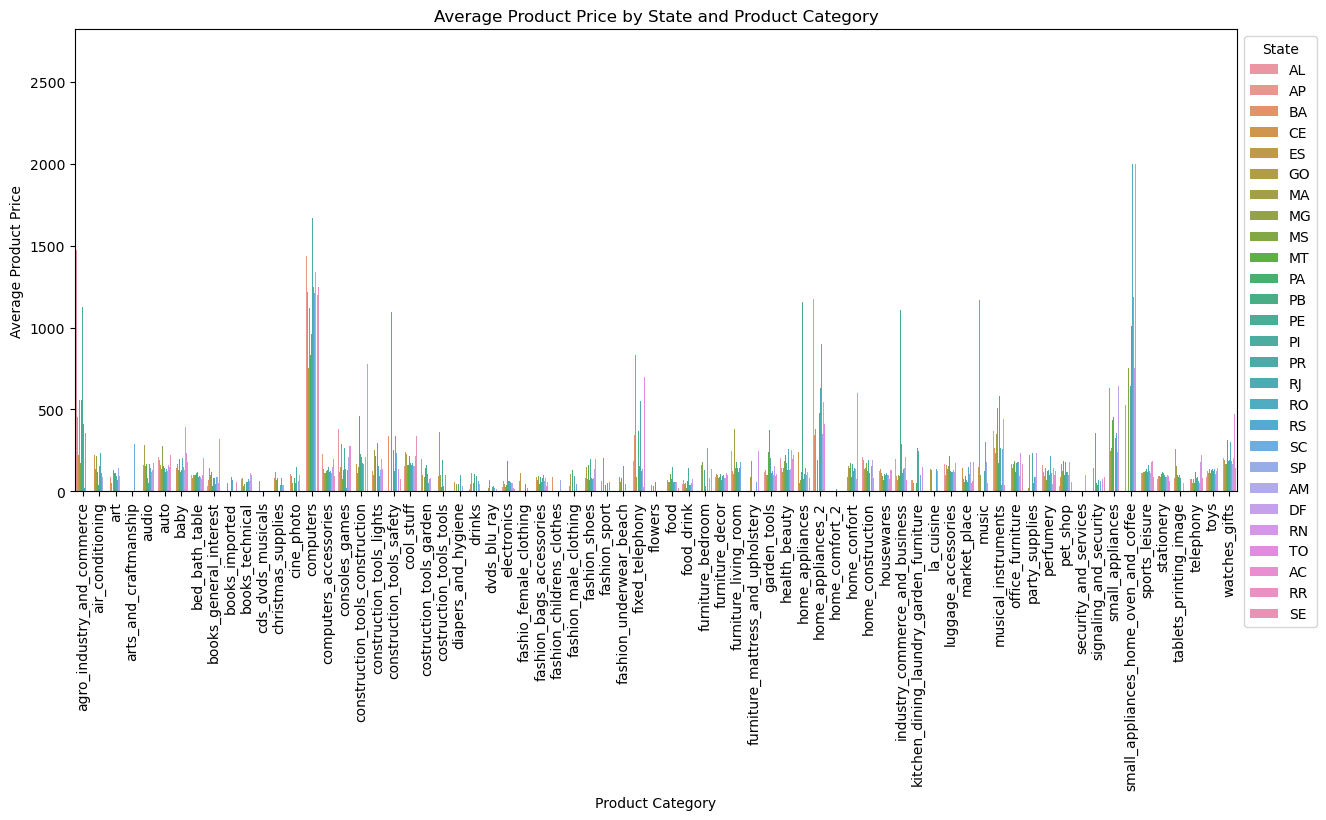

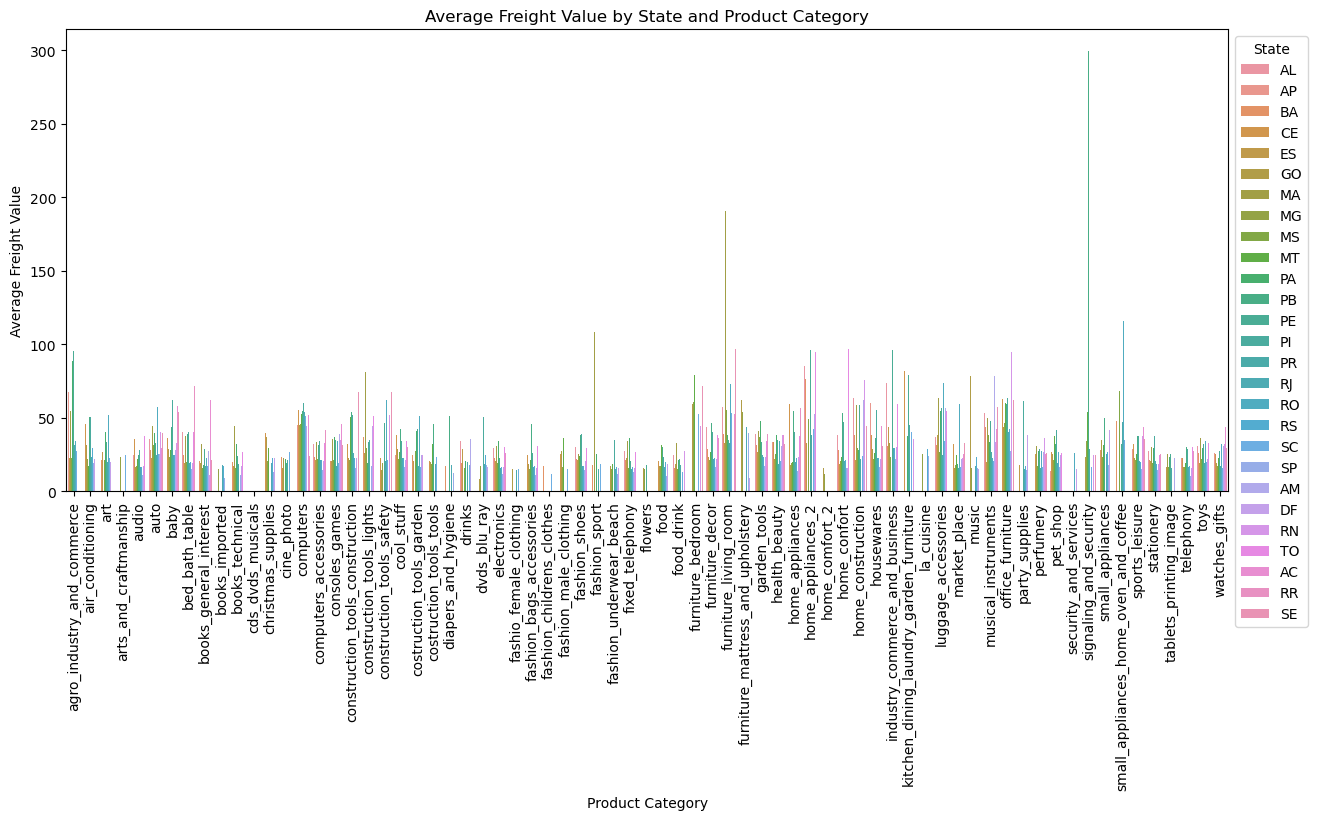

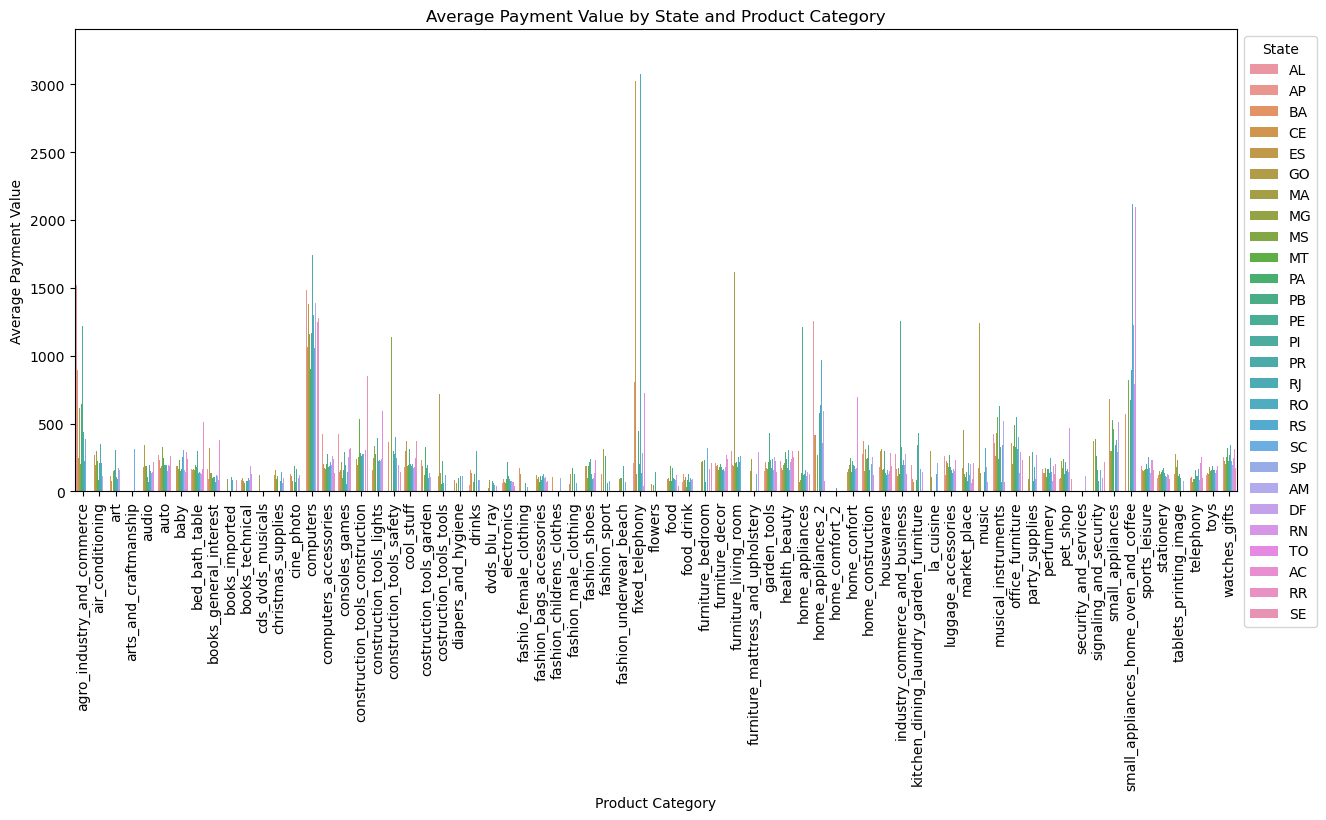

In [22]:
# Function to create bar plots for the given value
def create_bar_plot(data, value_col, title, ylabel):
    plt.figure(figsize=(15, 6))
    sns.barplot(x='product_category', y=value_col, hue='state', data=data)
    plt.title(title)
    plt.xlabel('Product Category')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.legend(title='State', bbox_to_anchor=(1, 1))
    plt.show()

# Create bar plots for average product price, average freight value, and average payment value
create_bar_plot(average_values, 'avg_product_price', 'Average Product Price by State and Product Category', 'Average Product Price')
create_bar_plot(average_values, 'avg_freight_value', 'Average Freight Value by State and Product Category', 'Average Freight Value')
create_bar_plot(average_values, 'avg_payment_value', 'Average Payment Value by State and Product Category', 'Average Payment Value')

# Let’s ask ChatGPT 3.12

In [23]:
# Loading required data
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [25]:
# Merge the DataFrames
merged_data = (
    df_orders.merge(df_order_items, on='order_id')
    .merge(df_products, on='product_id')
    .merge(df_order_reviews, on='order_id')
    .merge(df_product_category_translation, on='product_category_name')
)

# Group by product_category_name_english, seller_id, and review_score
review_score_distribution = merged_data.groupby(
    ['product_category_name_english', 'seller_id', 'review_score']
    ).size().reset_index(name='count')

# Let’s ask ChatGPT 3.13

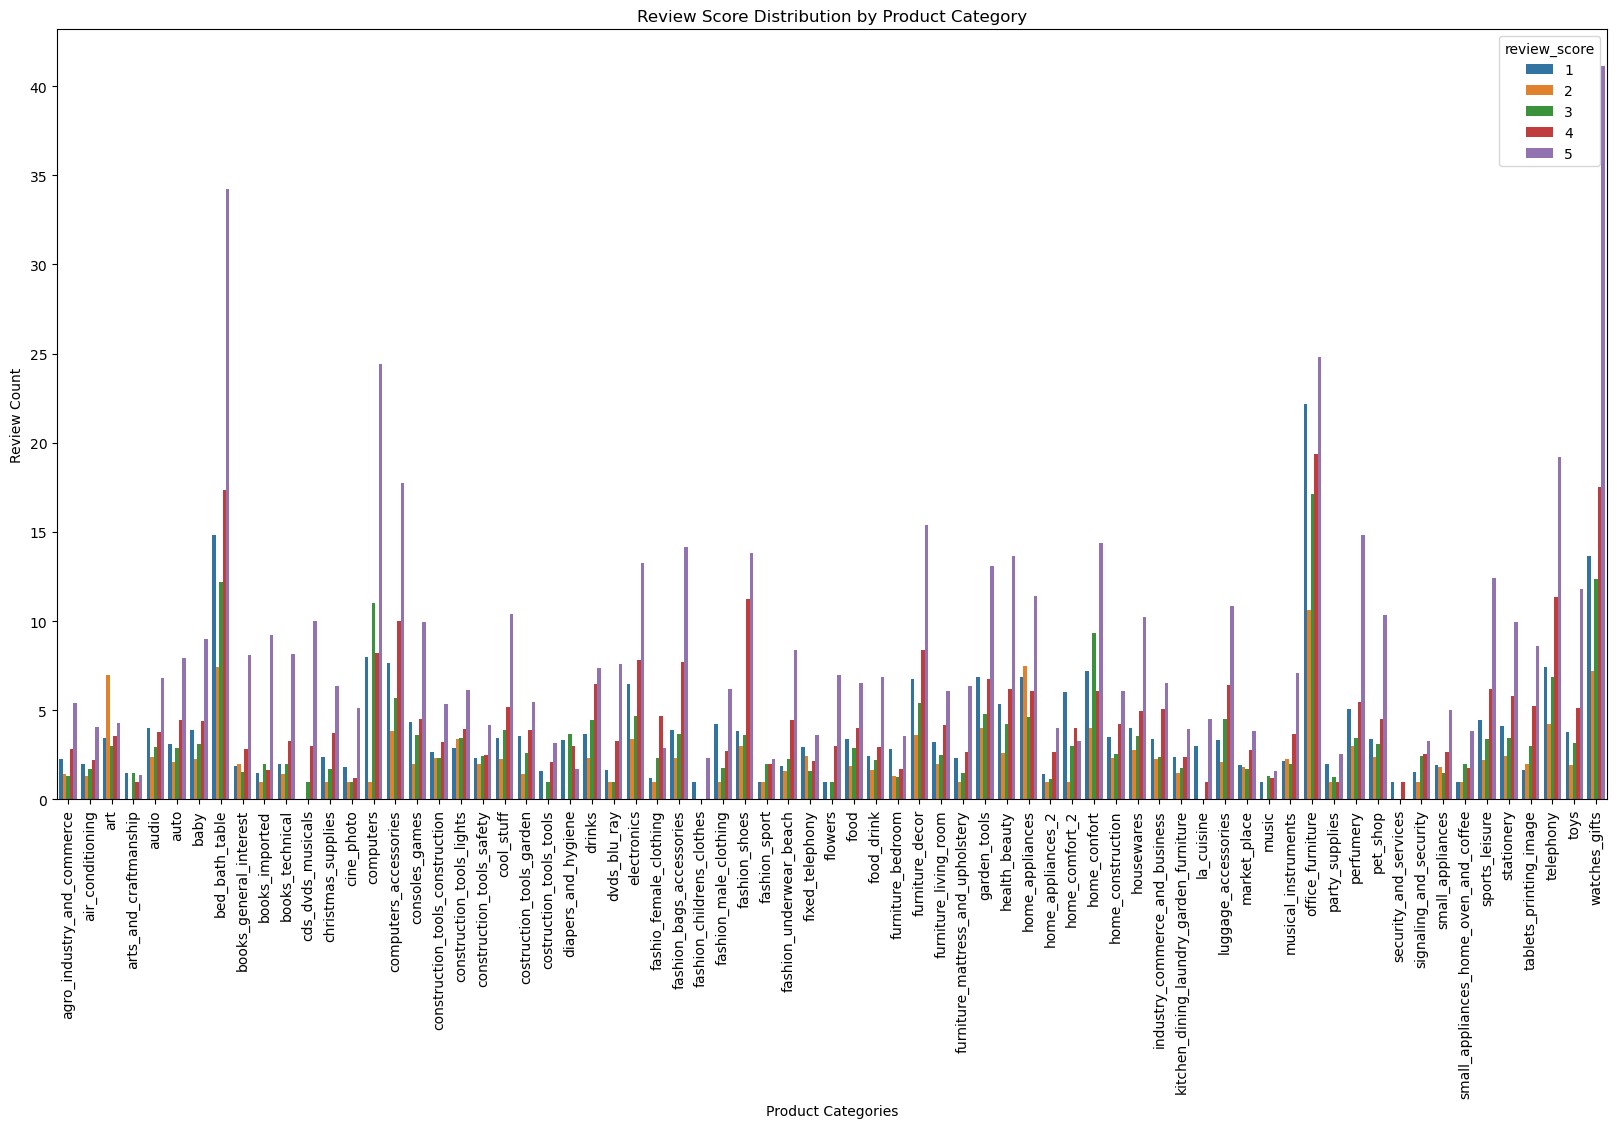

In [26]:
# Set a larger figure size
plt.figure(figsize=(20, 10))

# Create the grouped bar chart
sns.barplot(data=review_score_distribution,
            x='product_category_name_english',
            y='count',
            hue='review_score',
            errorbar=None) # ci=None parameter was replaced by authors with a proper one

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels for the axes and the title
plt.xlabel('Product Categories')
plt.ylabel('Review Count')
plt.title('Review Score Distribution by Product Category')

# Show the plot
plt.show()

# Let’s ask ChatGPT 3.14

In [27]:
def categorize_review_score(score):
    if score >= 4:
        return 'Positive'
    else:
        return 'Negative'

review_score_distribution['review_category'] =\
review_score_distribution['review_score'].apply(categorize_review_score)

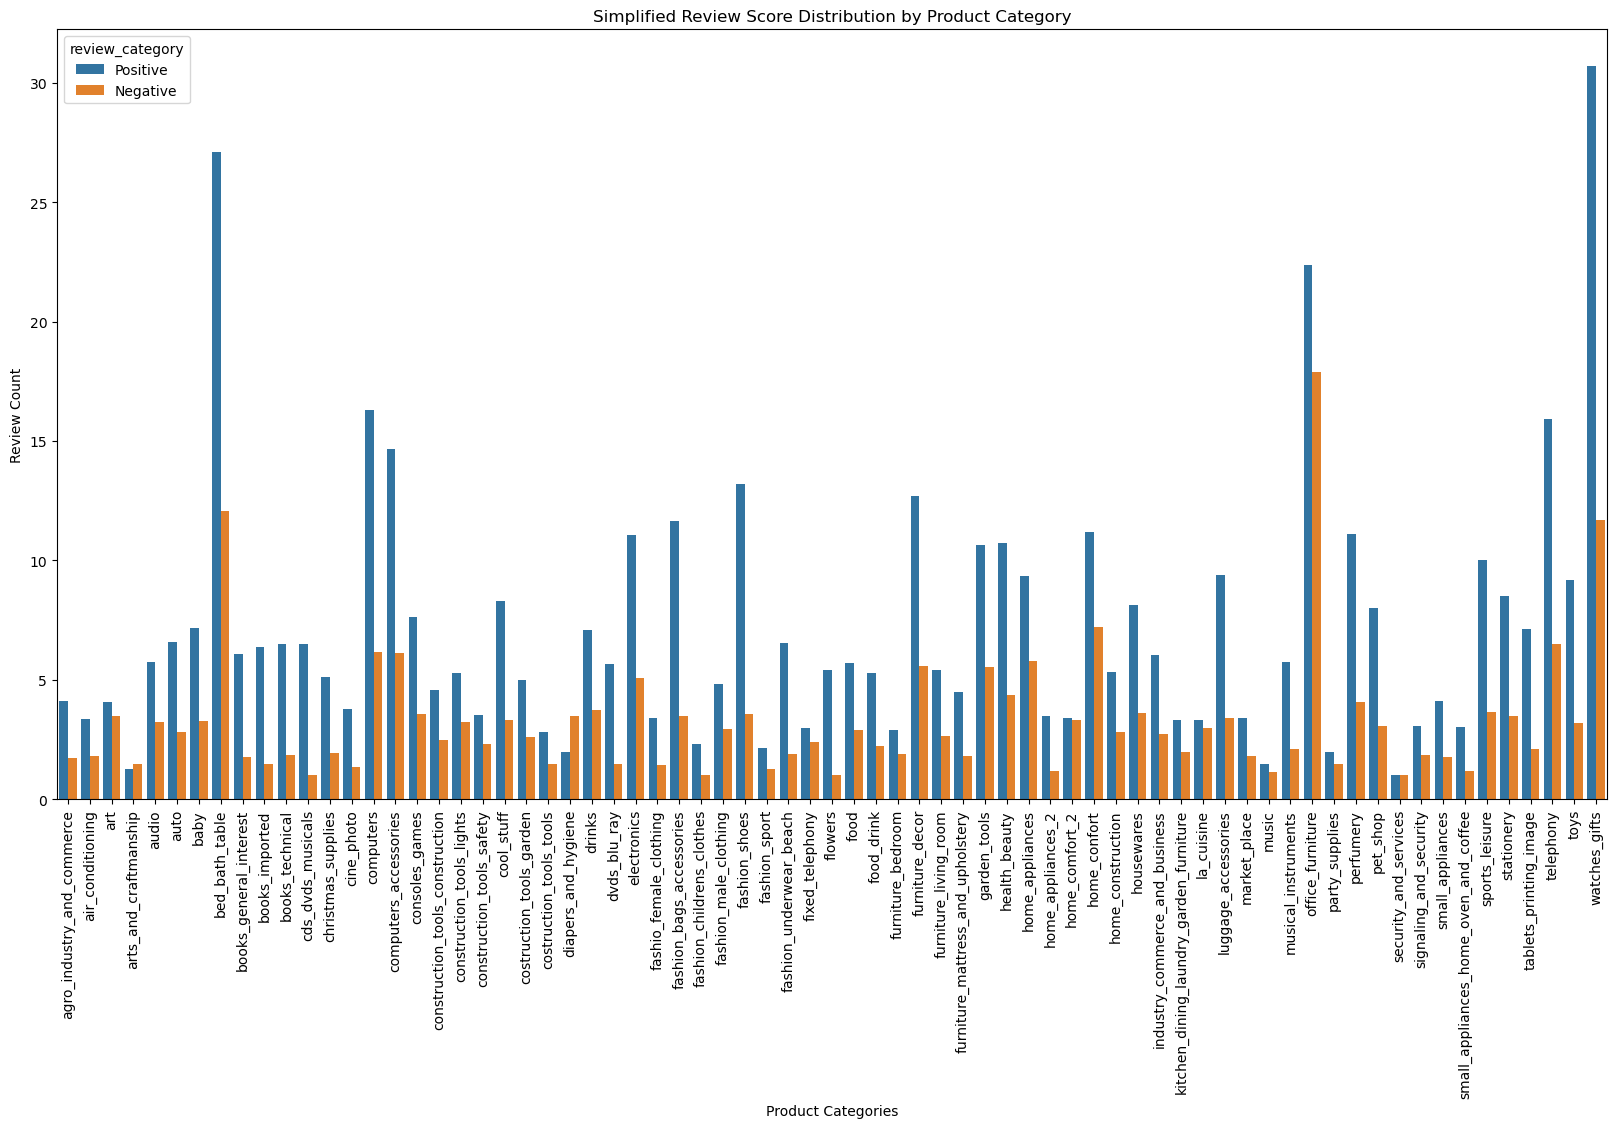

In [28]:
# Set a larger figure size
plt.figure(figsize=(20, 10))

# Create the grouped bar chart
sns.barplot(data=review_score_distribution,
            x='product_category_name_english',
            y='count',
            hue='review_category',
            errorbar=None) # ci=None parameter was replaced by authors with a proper one

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels for the axes and the title
plt.xlabel('Product Categories')
plt.ylabel('Review Count')
plt.title('Simplified Review Score Distribution by Product Category')

# Show the plot
plt.show()

# Let’s ask ChatGPT 4.15 & Appendix 4.3

In [30]:
def categorize_product_category(category):
    category_mapping = {
    'Home & Furniture': ['bed_bath_table', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture', 'home_confort', 'home_comfort_2', 'home_construction', 'housewares'],
    'Electronics & Computers': ['audio', 'computers', 'computers_accessories', 'electronics', 'telephony', 'tablets_printing_image', 'fixed_telephony'],
    'Fashion': ['fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach'],
    'Entertainment': ['art', 'arts_and_craftmanship', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'consoles_games', 'cool_stuff', 'cine_photo', 'dvds_blu_ray', 'music', 'musical_instruments', 'toys', 'watches_gifts'],
    'Sports & Leisure': ['sports_leisure', 'garden_tools'],
    'Health & Beauty': ['health_beauty', 'perfumery'],
    'Baby & Kids': ['baby', 'diapers_and_hygiene', 'fashion_childrens_clothes'],
    'Office & Industry': ['agro_industry_and_commerce', 'industry_commerce_and_business', 'office_furniture', 'stationery'],
    'Home Appliances': ['air_conditioning', 'home_appliances', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee'],
    'Tools & Construction': ['construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'costruction_tools_garden', 'costruction_tools_tools'],
    'Auto & Accessories': ['auto'],
    'Food & Drink': ['food', 'food_drink', 'drinks'],
    'Miscellaneous': ['flowers', 'la_cuisine', 'luggage_accessories', 'market_place', 'party_supplies', 'pet_shop', 'security_and_services', 'signaling_and_security'],
}
    for key, values in category_mapping.items():
        if category in values:
            return key
    return 'Unknown'

review_score_distribution['product_category_group'] =\
review_score_distribution['product_category_name_english'].apply(categorize_product_category)

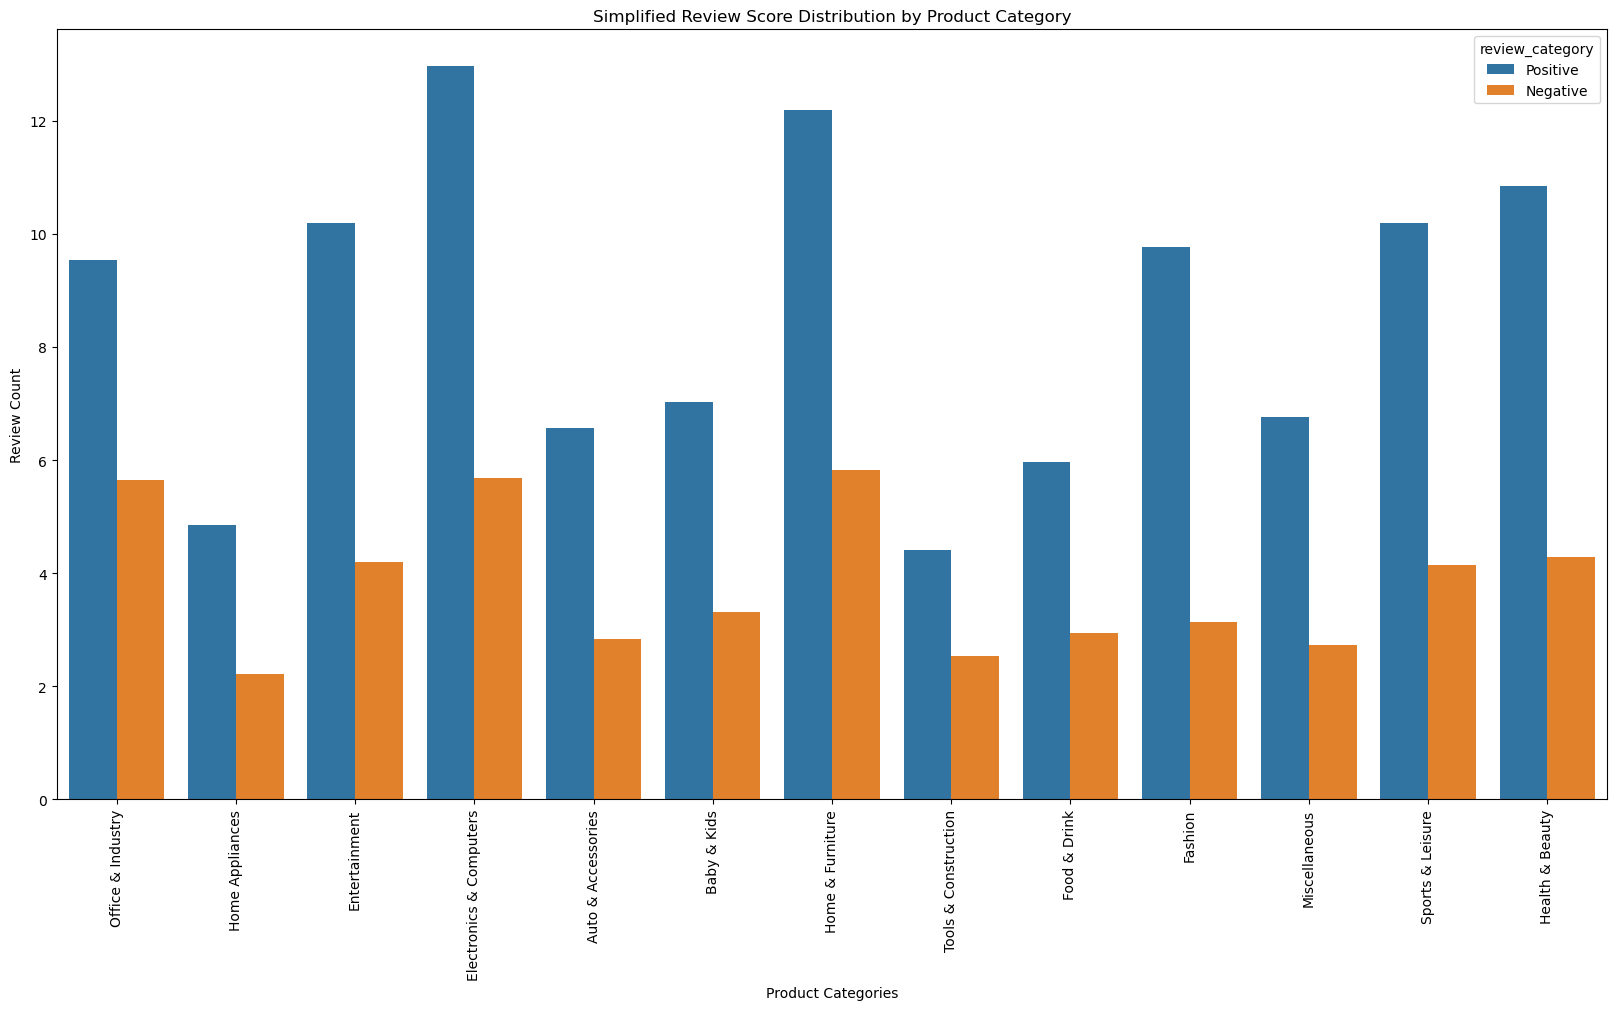

In [31]:
# Set a larger figure size
plt.figure(figsize=(20, 10))

# Create the grouped bar chart
sns.barplot(data=review_score_distribution,
            x='product_category_group',
            y='count',
            hue='review_category',
            errorbar=None) # ci=None parameter was replaced by authors with a proper one

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels for the axes and the title
plt.xlabel('Product Categories')
plt.ylabel('Review Count')
plt.title('Simplified Review Score Distribution by Product Category')

# Show the plot
plt.show()

# Let’s ask ChatGPT 3.16

In [32]:
# Assuming you have already loaded the necessary DataFrames:
# df_orders, df_order_items, df_products, and df_product_category_translation

# Merge df_orders with df_order_items on 'order_id'
orders_items = pd.merge(df_orders, df_order_items, on='order_id')

# Merge orders_items with df_products on 'product_id'
orders_items_products = pd.merge(orders_items, df_products, on='product_id')

# Merge orders_items_products with df_product_category_translation on 'product_category_name'
merged_data = pd.merge(orders_items_products, df_product_category_translation, on='product_category_name')

# Group by 'order_status', 'product_category_name_english', and 'seller_id', then count the occurrences
status_distribution = merged_data.groupby(['order_status', 'product_category_name_english', 'seller_id']).size().reset_index(name='count')

# Sort the result by 'order_status', 'product_category_name_english', and 'count' in descending order
status_distribution_sorted = status_distribution.sort_values(['order_status', 'product_category_name_english', 'count'], ascending=[True, True, False])

status_distribution_sorted

order_status product_category_name_english  \
0        approved         computers_accessories   
1        approved                    housewares   
2        canceled              air_conditioning   
3        canceled              air_conditioning   
4        canceled                           art   
...           ...                           ...   
7519  unavailable                          baby   
7520  unavailable                          baby   
7521  unavailable                    cool_stuff   
7522  unavailable                   electronics   
7523  unavailable                     perfumery   

                             seller_id  count  
0     8cc6a0e5738e61a87b03c78b2ba9db4b      2  
1     5444b12c82f21c923f2639ebc722c1ea      1  
2     6a51fc556dab5f766ced6fbc860bc613      1  
3     e5e33c0d8e7e002f398f5dc4cbbb338f      1  
4     50c361bcf670d16f6df4d52de3dff924      1  
...                                ...    ...  
7519  3d01d1c414c44b5943a09619ff3853cb      1  
7520  61f159ef6da2d441951d2c0efa719362      1  
7521  cf281cf8b7affbdfe751b29cc85580e1      1  
7522  f0563bacf40c311f1c4d3d6b67b8a7a7      1  
7523  620c87c171fb2a6dd6e8bb4dec959fc6      2  

[7524 rows x 4 columns]

# Let’s ask ChatGPT 3.17

<Figure size 2000x1000 with 0 Axes>

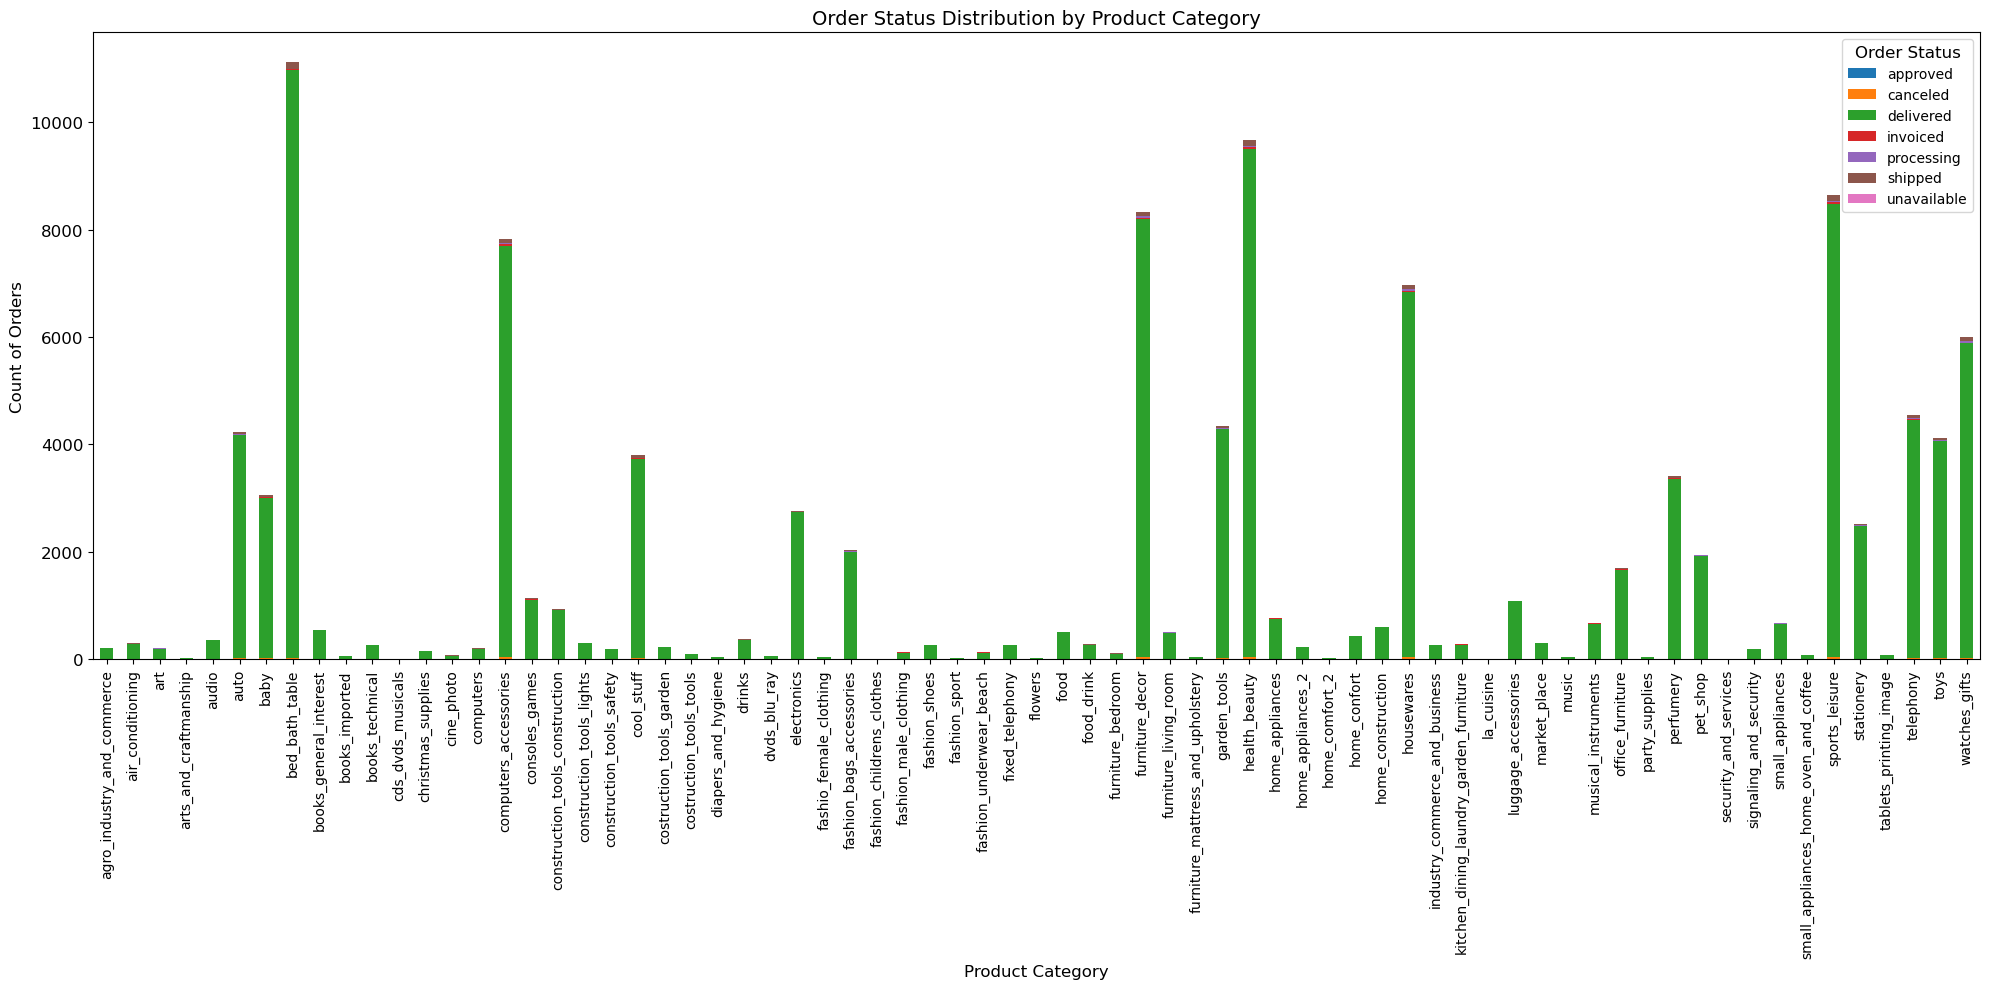

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the DataFrame for the stacked bar chart
status_pivot = status_distribution_sorted.pivot_table(index='product_category_name_english',
                                                      columns='order_status',
                                                      values='count',
                                                      aggfunc='sum',
                                                      fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(20, 10))
status_pivot.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Order Status Distribution by Product Category', fontsize=14)
plt.legend(title='Order Status', title_fontsize=12, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

# Let’s ask ChatGPT 3.18

In [34]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['delivery_time'] = (
    df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
    ).dt.days

In [35]:
# Loading required data
df_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [36]:
df_orders_customers = df_orders.merge(df_customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id')
df_orders_customers_sellers = df_orders_customers.merge(df_order_items[['order_id', 'seller_id']], on='order_id')
df_orders_customers_sellers = df_orders_customers_sellers.merge(df_sellers[['seller_id', 'seller_city', 'seller_state']], on='seller_id')

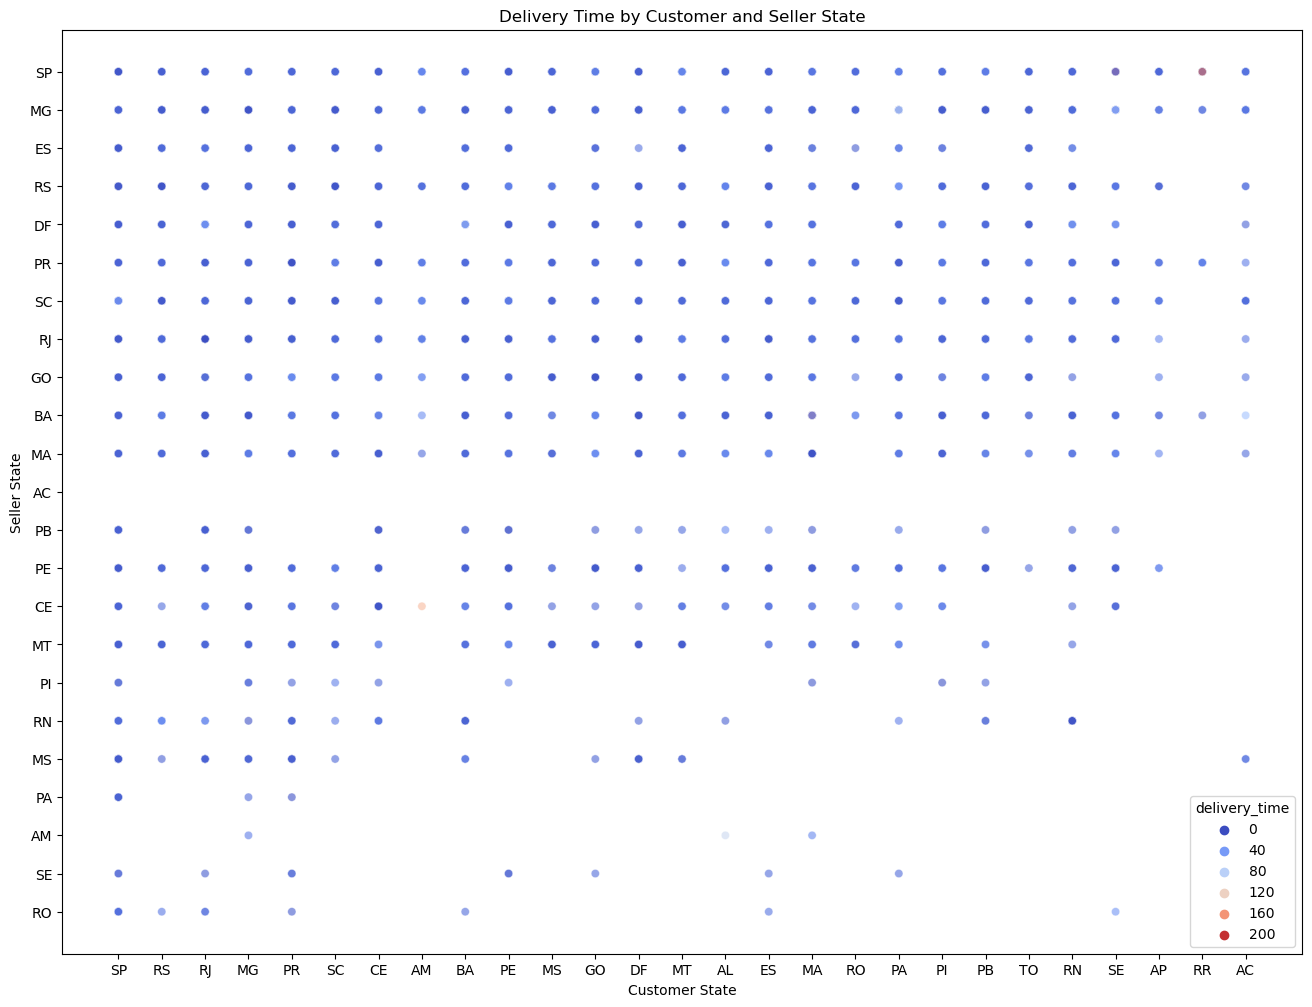

In [37]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_orders_customers_sellers, x='customer_state', y='seller_state', hue='delivery_time', palette='coolwarm', alpha=0.6)
plt.xlabel("Customer State")
plt.ylabel("Seller State")
plt.title("Delivery Time by Customer and Seller State")
plt.show()

# Let’s ask ChatGPT 3.19

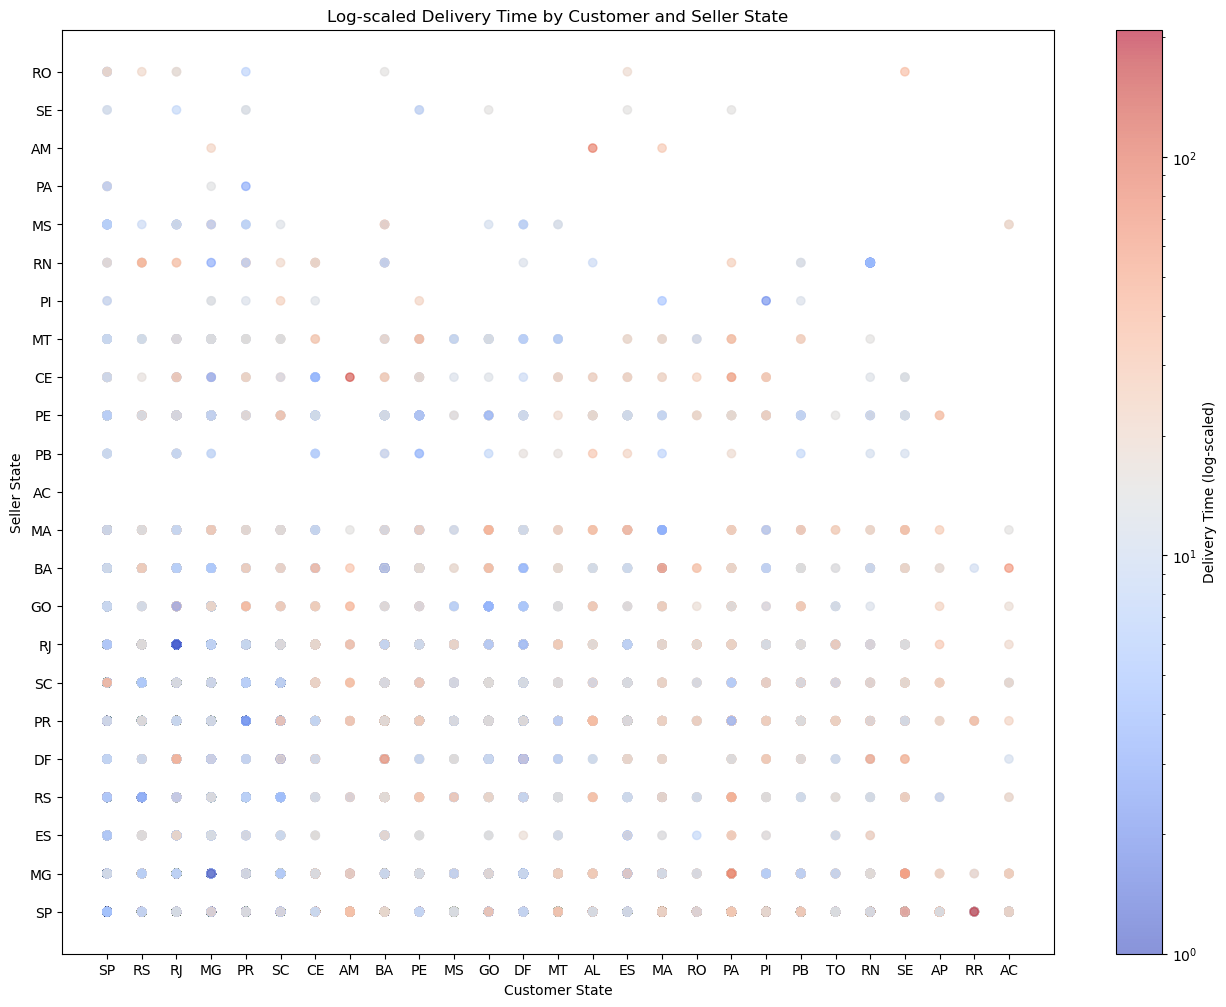

In [38]:
# Create the scatter plot
plt.figure(figsize=(16, 12))

# Use LogNorm for color normalization
norm = mcolors.LogNorm(vmin=df_orders_customers_sellers['delivery_time'].min() + 1, vmax=df_orders_customers_sellers['delivery_time'].max())

plt.scatter(x=df_orders_customers_sellers['customer_state'], y=df_orders_customers_sellers['seller_state'], c=df_orders_customers_sellers['delivery_time'], cmap='coolwarm', alpha=0.6, norm=norm)

plt.xlabel("Customer State")
plt.ylabel("Seller State")
plt.title("Log-scaled Delivery Time by Customer and Seller State")
plt.colorbar(label="Delivery Time (log-scaled)")

plt.show()

# Let’s ask ChatGPT 3.20

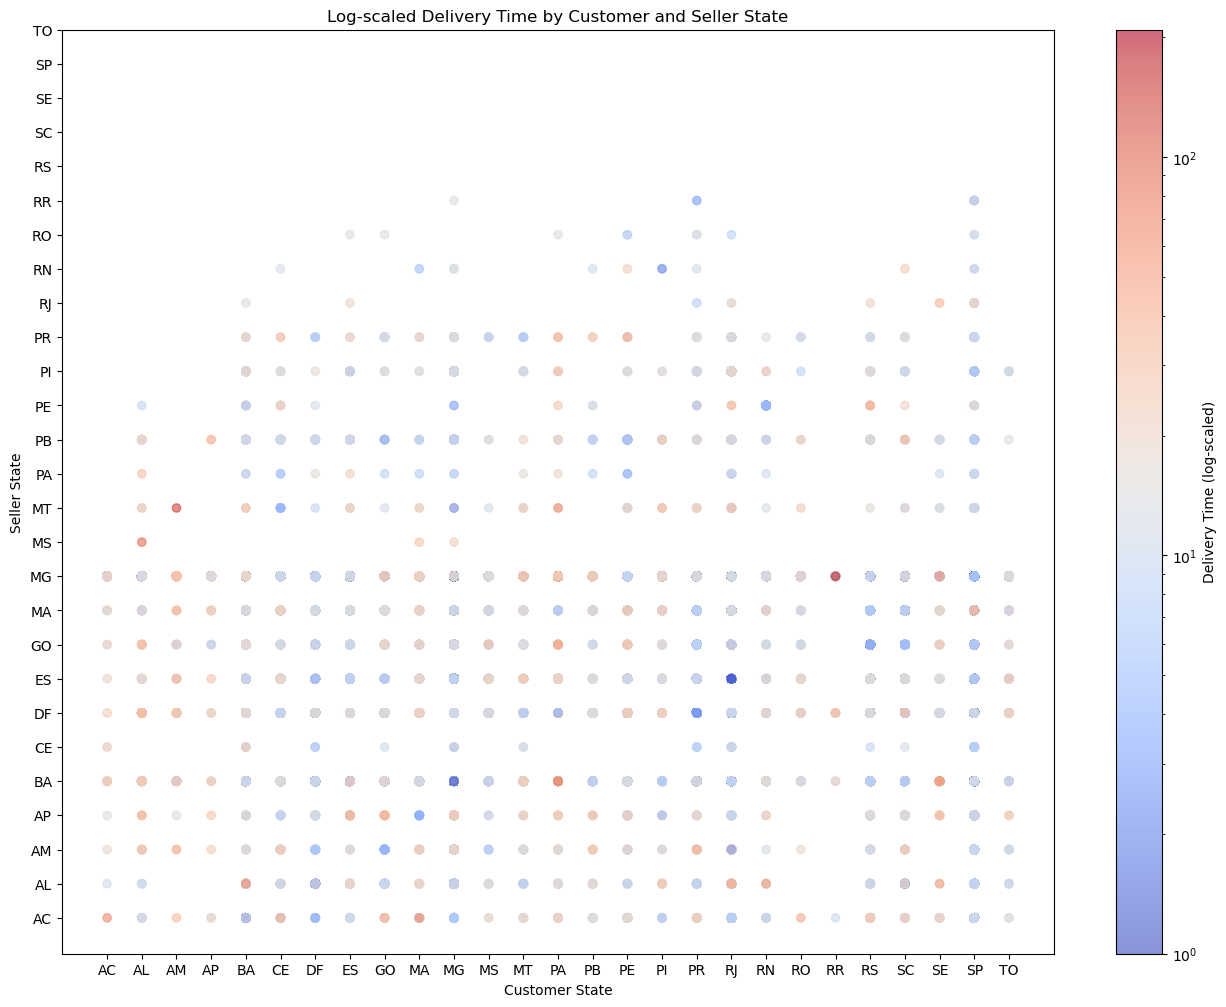

In [39]:
# Sort the data by customer_state and seller_state
df_sorted = df_orders_customers_sellers.sort_values(by=['customer_state', 'seller_state'])

# Create the scatter plot
plt.figure(figsize=(16, 12))

# Use LogNorm for color normalization
norm = mcolors.LogNorm(vmin=df_orders_customers_sellers['delivery_time'].min() + 1, vmax=df_orders_customers_sellers['delivery_time'].max())

plt.scatter(x=df_sorted['customer_state'], y=df_sorted['seller_state'], c=df_sorted['delivery_time'], cmap='coolwarm', alpha=0.6, norm=norm)

plt.xlabel("Customer State")
plt.ylabel("Seller State")
plt.title("Log-scaled Delivery Time by Customer and Seller State")
plt.colorbar(label="Delivery Time (log-scaled)")

# Get the unique state values and sort them
sorted_states = sorted(df_sorted['customer_state'].unique())

# Set the same order for both x and y axes
ax = plt.gca()
ax.set_xticks(range(len(sorted_states)))
ax.set_xticklabels(sorted_states)
ax.set_yticks(range(len(sorted_states)))
ax.set_yticklabels(sorted_states)

plt.show()

# Let’s ask ChatGPT 3.21

In [40]:
# Merge the DataFrames
merged_df = df_order_items.merge(df_products, on="product_id", how="left")

# Calculate product volume
merged_df["product_volume"] =\
merged_df["product_length_cm"] * merged_df["product_height_cm"] * merged_df["product_width_cm"]

# Filter out the relevant columns
analysis_df = merged_df[["freight_value", "product_weight_g", "product_volume"]]

# Remove rows with NaN values
analysis_df = analysis_df.dropna()

In [41]:
# Linear regression for weight
X_weight = sm.add_constant(analysis_df["product_weight_g"])
y = analysis_df["freight_value"]
model_weight = sm.OLS(y, X_weight).fit()

# Linear regression for volume
X_volume = sm.add_constant(analysis_df["product_volume"])
y = analysis_df["freight_value"]
model_volume = sm.OLS(y, X_volume).fit()

In [42]:
# Function to plot regression line with confidence interval
def plot_regression_with_ci(X, y, model, xlabel, ylabel):
    fig, ax = plt.subplots()
    sns.regplot(x=X.iloc[:, 1], y=y, ax=ax, scatter_kws={'alpha': 0.3})
    st, data, ss2 = summary_table(model, alpha=0.05)
    predicted = data[:, 2]
    upper = data[:, 4]
    lower = data[:, 5]
    ax.plot(X.iloc[:, 1], predicted, '-', lw=2, color='red', label='Fitted Line')
    ax.fill_between(X.iloc[:, 1], lower, upper, color='red', alpha=0.15, label='95% CI')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

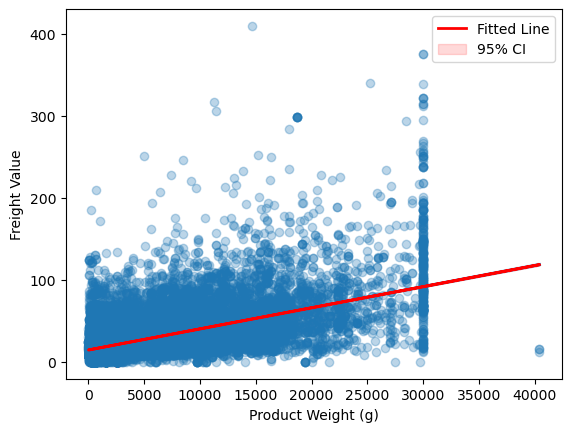

In [43]:
# Plot the relationship between weight and freight value
plot_regression_with_ci(X_weight, y, model_weight, xlabel="Product Weight (g)", ylabel="Freight Value")

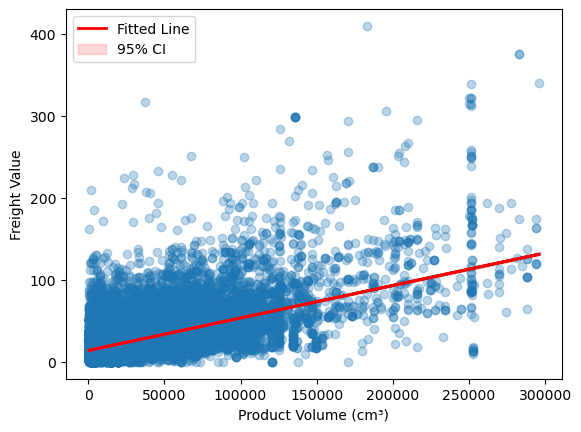

In [44]:
# Plot the relationship between volume and freight value
plot_regression_with_ci(X_volume, y, model_volume, xlabel="Product Volume (cm³)", ylabel="Freight Value")

# Let’s ask ChatGPT 3.22

In [45]:
# Split the data into features (X) and target (y)
X_weight = analysis_df["product_weight_g"].values.reshape(-1, 1)
X_weight = sm.add_constant(X_weight)  # Add a constant for the intercept
X_volume = analysis_df["product_volume"].values.reshape(-1, 1)
X_volume = sm.add_constant(X_volume)  # Add a constant for the intercept

y = analysis_df["freight_value"].values

# Predict the target variable using the models
y_pred_weight = model_weight.predict(X_weight)
y_pred_volume = model_volume.predict(X_volume)

# Calculate the evaluation metrics for both models
mae_weight = mean_absolute_error(y, y_pred_weight)
mse_weight = mean_squared_error(y, y_pred_weight)
rmse_weight = np.sqrt(mse_weight)
r2_weight = r2_score(y, y_pred_weight)

mae_volume = mean_absolute_error(y, y_pred_volume)
mse_volume = mean_squared_error(y, y_pred_volume)
rmse_volume = np.sqrt(mse_volume)
r2_volume = r2_score(y, y_pred_volume)

# Print the evaluation metrics
print(f"Product Weight Model: MAE={mae_weight:.2f}, MSE={mse_weight:.2f}, RMSE={rmse_weight:.2f}, R2={r2_weight:.2f}")
print(f"Product Volume Model: MAE={mae_volume:.2f}, MSE={mse_volume:.2f}, RMSE={rmse_volume:.2f}, R2={r2_volume:.2f}")

Product Weight Model: MAE=6.89, MSE=156.77, RMSE=12.52, R2=0.37
Product Volume Model: MAE=7.41, MSE=163.70, RMSE=12.79, R2=0.34


# Let’s ask ChatGPT 3.23

In [48]:
# Merge the DataFrames
merged_df = df_order_items.merge(df_products, on="product_id", how="left")

# Calculate product volume
merged_df["product_volume"] =\
merged_df["product_length_cm"] * merged_df["product_height_cm"] * merged_df["product_width_cm"]

# Filter out the relevant columns
analysis_df = merged_df[["freight_value", "product_weight_g", "product_volume"]]

# Remove rows with NaN values
analysis_df = analysis_df.dropna()

# Define the independent variables (weight and volume) and the dependent variable (freight value)
X = analysis_df[['product_weight_g', 'product_volume']]
y = analysis_df['freight_value']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          freight_value   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                 3.744e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        15:20:16   Log-Likelihood:            -4.4203e+05
No. Observations:              112632   AIC:                         8.841e+05
Df Residuals:                  112629   BIC:                         8.841e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.7268      0.044  

# Let’s ask ChatGPT 3.24 & Listing 3.1

In [49]:
# Merge df_products with df_product_category_translation
products_merged = pd.merge(df_products, df_product_category_translation, on='product_category_name')

# Merge df_orders with df_order_items
order_items_merged = pd.merge(df_orders, df_order_items, on='order_id')

# Merge the resulting DataFrame with df_customers
order_customer_merged = pd.merge(order_items_merged, df_customers, on='customer_id')

# Merge the resulting DataFrame with products_merged
order_product_merged = pd.merge(order_customer_merged, products_merged, on='product_id')

# Merge the resulting DataFrame with df_sellers
order_seller_merged = pd.merge(order_product_merged, df_sellers, on='seller_id')

# Merge the resulting DataFrame with df_order_reviews
order_review_merged = pd.merge(order_seller_merged, df_order_reviews, on='order_id')

# Merge the resulting DataFrame with df_order_payments
analysis_df = pd.merge(order_review_merged, df_order_payments, on='order_id')

# Calculate delivery time in days
analysis_df['delivery_time'] = (analysis_df['order_delivered_customer_date'] - analysis_df['order_purchase_timestamp']).dt.days

# Calculate the difference between actual vs. estimated delivery time
analysis_df['delivery_time_misestimation'] = (pd.to_datetime(analysis_df['order_estimated_delivery_date']) - pd.to_datetime(analysis_df['order_delivered_customer_date'])).dt.days

# Calculate product volume
analysis_df['product_volume'] = analysis_df['product_length_cm'] * analysis_df['product_height_cm'] * analysis_df['product_width_cm']

# Apply one-hot encoding to the payment_type column
payment_type_dummies = pd.get_dummies(analysis_df['payment_type'], prefix='payment_type')

# Concatenate the one-hot encoded columns with analysis_df
analysis_df = pd.concat([analysis_df, payment_type_dummies], axis=1)

# Drop unnecessary columns
analysis_df.drop(columns=[
    'product_category_name', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_estimated_delivery_date', 
    'shipping_limit_date', 
    'review_creation_date', 
    'review_answer_timestamp',
    'order_id',
    'customer_id',
    'order_status',
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_item_id',
    'product_id',
    'seller_id',
    'product_category_name_english',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
    'review_comment_message',
    'review_comment_title',
    'review_id',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',  
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'payment_type'
], inplace=True)

analysis_df = analysis_df.dropna()

In [31]:
# Prepare the data (assuming you have already merged necessary DataFrames into analysis_df)

# Convert categorical variables to numerical format if required
# (e.g., using pd.get_dummies() for product categories)

# Split the data into training and testing sets
X = analysis_df.drop("review_score", axis=1)
y = analysis_df["review_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the ordinal logistic regression model
model = mord.LogisticAT(alpha=0)
model.fit(X_train, y_train)

# Predict the review scores on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Analyze the model's coefficients
print("Coefficients:\n", model.coef_)

Accuracy: 0.43035067573535907
Confusion Matrix:
 [[  385    70   401  1637  1302]
 [   38    13    71   563   513]
 [   55    16   109  1342  1365]
 [   49    18   100  2909  3501]
 [   54    23   208  8021 11200]]
Coefficients:
 [-4.92618413e-02  1.63964377e-03  3.08760598e-03  1.38901936e-02
  1.93889038e-05  4.21370114e-01 -8.75650964e-06  3.59787432e-01
  2.93638614e-02 -1.72296023e-03  2.82130024e-02  9.50451240e-07
  1.32936583e-01  2.23209948e-01  1.31639907e-02 -5.95202359e-03]


# Let’s ask ChatGPT 3.25

In [32]:
# Assuming you have already fitted the model and have the `model` variable
# as the instance of the fitted model, e.g., model = mord.LogisticAT().fit(X_train, y_train)

# Get the feature names from the analysis_df DataFrame
# Replace 'X' with the actual variable name containing your independent variables
feature_names = X.columns

# Get the coefficients from the model
coefficients = model.coef_

# Create a dictionary to link the coefficients to the column names
coefficient_dict = dict(zip(feature_names, coefficients))

# Print the coefficients along with the corresponding column names
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef}")

delivery_time: -0.04926184129232652
price: 0.0016396437688542174
freight_value: 0.003087605979194856
product_name_lenght: 0.013890193611842357
product_description_lenght: 1.938890383573905e-05
product_photos_qty: 0.4213701136980763
product_weight_g: -8.756509636657266e-06
payment_sequential: 0.35978743241417466
payment_installments: 0.02936386138061978
payment_value: -0.001722960231783981
delivery_time_misestimation: 0.02821300240733595
product_volume: 9.504512398147115e-07
payment_type_boleto: 0.1329365830670677
payment_type_credit_card: 0.22320994812520034
payment_type_debit_card: 0.013163990732791755
payment_type_voucher: -0.005952023594428278


# Let’s ask ChatGPT 3.26 & Listing 3.2

In [50]:
# Merge df_products with df_product_category_translation
products_merged = pd.merge(df_products, df_product_category_translation, on='product_category_name')

# Merge df_orders with df_order_items
order_items_merged = pd.merge(df_orders, df_order_items, on='order_id')

# Merge the resulting DataFrame with df_customers
order_customer_merged = pd.merge(order_items_merged, df_customers, on='customer_id')

# Merge the resulting DataFrame with products_merged
order_product_merged = pd.merge(order_customer_merged, products_merged, on='product_id')

# Merge the resulting DataFrame with df_sellers
order_seller_merged = pd.merge(order_product_merged, df_sellers, on='seller_id')

# Merge the resulting DataFrame with df_order_reviews
order_review_merged = pd.merge(order_seller_merged, df_order_reviews, on='order_id')

# Merge the resulting DataFrame with df_order_payments
analysis_df = pd.merge(order_review_merged, df_order_payments, on='order_id')

In [51]:
# Choose a specific product category to analyze
product_category = "health_beauty"
filtered_df = analysis_df[analysis_df['product_category_name_english'] == product_category]

In [52]:
# Group the data by seller state or city, and calculate the metrics of interest
grouped_data = filtered_df.groupby('seller_state')
group_metrics = grouped_data.agg({'price': ['sum', 'mean', 'count'], 'review_score': 'mean'})

# Calculate the standard deviations
group_metrics['price', 'std'] = grouped_data['price'].std()
group_metrics['review_score', 'std'] = grouped_data['review_score'].std()

In [53]:
# Bootstrap the confidence intervals
def bootstrap_CI(data, func, n_bootstraps=1000, ci=95, axis=0):
    """
    Generate a confidence interval for a given statistic using bootstrapping.

    Parameters:
    data (numpy.ndarray or pandas.DataFrame): The data to calculate the statistic from.
    func (callable): The function used to calculate the statistic.
    n_bootstraps (int): The number of bootstrap samples to generate.
    ci (float): The confidence interval percentage (e.g., 95 for a 95% CI).
    axis (int): The axis along which to apply the statistic function (0 for columns, 1 for rows).

    Returns:
    tuple: The lower and upper bounds of the confidence interval.
    """
    bootstrapped_statistics = []
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_statistic = func(bootstrap_sample, axis=axis)
        bootstrapped_statistics.append(bootstrapped_statistic)

    lower_bound = np.percentile(bootstrapped_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_statistics, 100 - (100 - ci) / 2)

    return lower_bound, upper_bound

# Create a new DataFrame to store the confidence intervals
def calculate_ci(group):
    return pd.Series({
        'price_ci_lower': bootstrap_CI(group['price'], np.mean, n_bootstraps=1000, ci=95)[0],
        'price_ci_upper': bootstrap_CI(group['price'], np.mean, n_bootstraps=1000, ci=95)[1],
        'review_score_ci_lower': bootstrap_CI(group['review_score'], np.mean, n_bootstraps=1000, ci=95)[0],
        'review_score_ci_upper': bootstrap_CI(group['review_score'], np.mean, n_bootstraps=1000, ci=95)[1]
    })

ci_df = grouped_data.apply(calculate_ci)

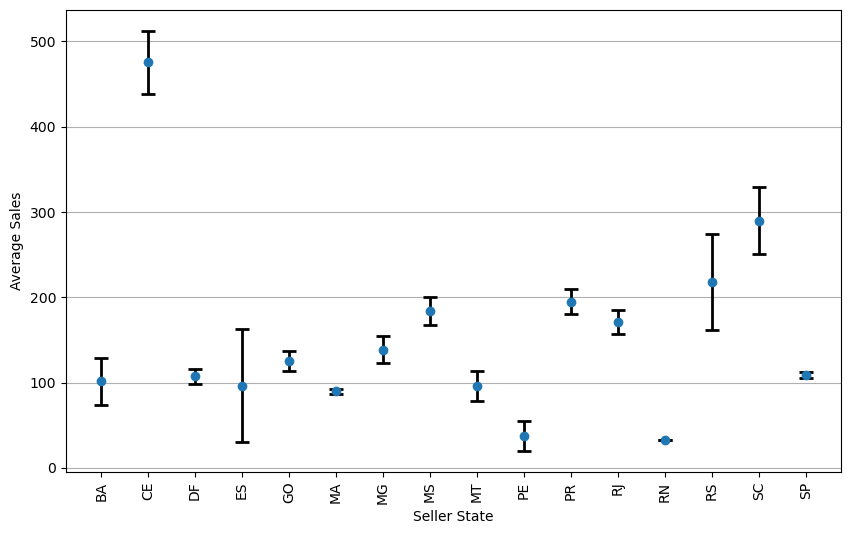

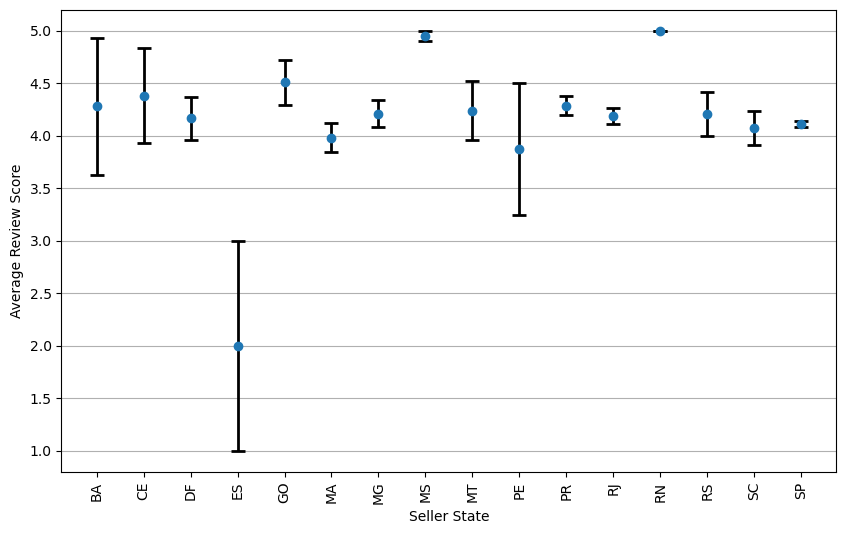

In [54]:
def plot_error_bars_only(df, metric_name, ylabel='', title='', figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)

    x = np.arange(len(df.index))
    y = df[metric_name + '_ci_lower'] + (df[metric_name + '_ci_upper'] - df[metric_name + '_ci_lower']) / 2
    yerr = (df[metric_name + '_ci_upper'] - df[metric_name + '_ci_lower']) / 2

    plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, capthick=2, ecolor='black', elinewidth=2)

    plt.xticks(x, df.index, rotation=90)
    plt.xlabel('Seller State')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y')

    plt.show()
    
# Plot the confidence intervals
plot_error_bars_only(ci_df, 'price', ylabel='Average Sales')
plot_error_bars_only(ci_df, 'review_score', ylabel='Average Review Score')